In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv")

In [80]:
pima.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [81]:

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
X = pima[feature_cols] 
y = pima['Outcome'] 

In [82]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [83]:

from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

e:\setup\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[125,   0],
       [  0,  67]])

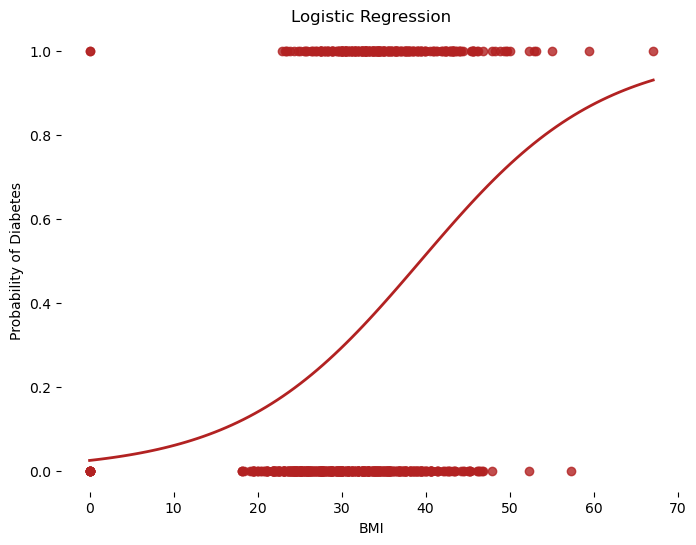

In [86]:


X = df['BMI']
y = df['Outcome']

plt.figure(figsize=(8,6))
sns.regplot(
    x=X,
    y=y,
    logistic=True,   
    ci=None,         
    scatter=True,    
    color='firebrick',
    line_kws={'lw':2}  
)

plt.title('Logistic Regression')
plt.xlabel('BMI')
plt.ylabel('Probability of Diabetes')
plt.box(False)
plt.show()




C:\Users\simra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


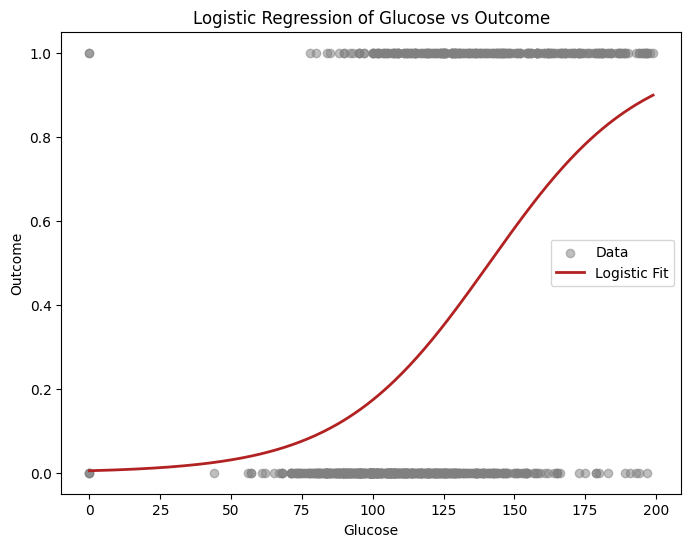

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("diabetes.csv")

X = df[["Glucose"]]    
y = df["Outcome"]   

model = LogisticRegression()
model.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.5, color="gray", label="Data")
plt.plot(x_range, y_prob, color="firebrick", linewidth=2, label="Logistic Fit")
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.title("Logistic Regression of Glucose vs Outcome")
plt.legend()
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
df = pd.read_csv("diabetes.csv")
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [7]:
y_pred = model.predict(X_test)

In [8]:
cnf_matrix = confusion_matrix(y_test, y_pred)

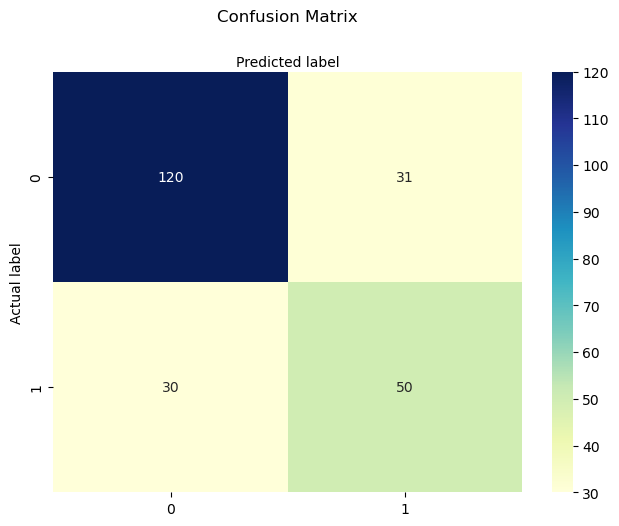

In [9]:
class_names = [0, 1]  # classes: 0 = No diabetes, 1 = Diabetes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
